In [99]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### **🛩 Import libraries and dataset**
****

1. Import libraries necessary and dataset

In [100]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from itertools import combinations 
from scipy import stats 

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 




In [101]:
train = pd.read_csv("/Users/rayanbessadi/Documents/Code/Data science/Data science/Satisfaction/train_beginner.csv")
test = pd.read_csv("/Users/rayanbessadi/Documents/Code/Data science/Data science/Satisfaction/test_beginner.csv")

train.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Seat comfort,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,13,Personal Travel,Eco Plus,460,3,4,5,4,5,25,neutral or dissatisfied
1,Male,25,Business travel,Business,235,3,2,1,1,1,1,neutral or dissatisfied
2,Female,26,Business travel,Business,1142,2,2,5,4,5,0,satisfied
3,Female,25,Business travel,Business,562,2,5,2,1,2,11,neutral or dissatisfied
4,Male,61,Business travel,Business,214,3,3,5,3,3,0,satisfied


2. Create a table the outlines some information on our train data including: Count, unique, frequency, mean, standard deviation etc.

In [102]:
desc = pd.DataFrame(train.describe(include = 'all').transpose())

desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,103904,2,Female,52727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,103904.0,NaN,NaN,NaN,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Type of Travel,103904,2,Business travel,71655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,103904,3,Business,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,103904.0,NaN,NaN,NaN,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,NaN,NaN,NaN,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,NaN,NaN,NaN,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,NaN,NaN,NaN,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Checkin service,103904.0,NaN,NaN,NaN,3.30429,1.265396,0.0,3.0,3.0,4.0,5.0
Cleanliness,103904.0,NaN,NaN,NaN,3.286351,1.312273,0.0,2.0,3.0,4.0,5.0


4. Use the summary stats function to view important information such as number of missing values, mean value, max value, data type etc

In [103]:
def summary_stats(df): 
    print(f'The shape of the data is: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['data type'])
    summary['Number of missing values'] = df.isnull().sum().values 
    summary['% of missing values'] = df.isnull().sum().values / len(df) * 100 
    summary['min value'] = desc['min'].values
    summary['mean value'] = desc['mean'].values
    summary['max value'] = desc['max'].values
    summary['mode value'] = df.mode().values[0]
    return summary

summary_stats(train)

The shape of the data is: (103904, 12)


,data type,Number of missing values,% of missing values,min value,mean value,max value,mode value
Gender,object,0,0.0,NaN,NaN,NaN,Female
Age,int64,0,0.0,7.0,39.379706,85.0,39
Type of Travel,object,0,0.0,NaN,NaN,NaN,Business travel
Class,object,0,0.0,NaN,NaN,NaN,Business
Flight Distance,int64,0,0.0,31.0,1189.448375,4983.0,337
Inflight wifi service,int64,0,0.0,0.0,2.729683,5.0,3
Departure/Arrival time convenient,int64,0,0.0,0.0,3.060296,5.0,4
Seat comfort,int64,0,0.0,0.0,3.439396,5.0,4
Checkin service,int64,0,0.0,0.0,3.30429,5.0,4
Cleanliness,int64,0,0.0,0.0,3.286351,5.0,4


5. Look at those variables that are most corrleated with whether someone is satisfied or not

In [104]:
numeric_columns = train.select_dtypes(include='number')
le = LabelEncoder()
train_display = train.copy()
# Perform one-hot encoding on the categorical columns
categorical_columns = train.select_dtypes(exclude='number')
for col in categorical_columns.columns:
     train_display[col] = le.fit_transform(train[col])

# Concatenate the numeric and encoded categorical columns
# processed_data = pd.concat([numeric_columns, encoded_categorical], axis=1)

# Calculate the correlation matrix
train_display.corr().loc['satisfaction'].abs().sort_values(ascending=False)

satisfaction                         1.000000
Class                                0.449321
Type of Travel                       0.449000
Seat comfort                         0.349459
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Checkin service                      0.236174
Age                                  0.137167
Departure/Arrival time convenient    0.051601
Departure Delay in Minutes           0.050494
Gender                               0.012211
Name: satisfaction, dtype: float64

#### **🛩 Exploratory data analysis**
****

6. Create some count plots of non-numerical categorical columns to view how many of each unique valeue that there is? (q: what insights can we get from this?)

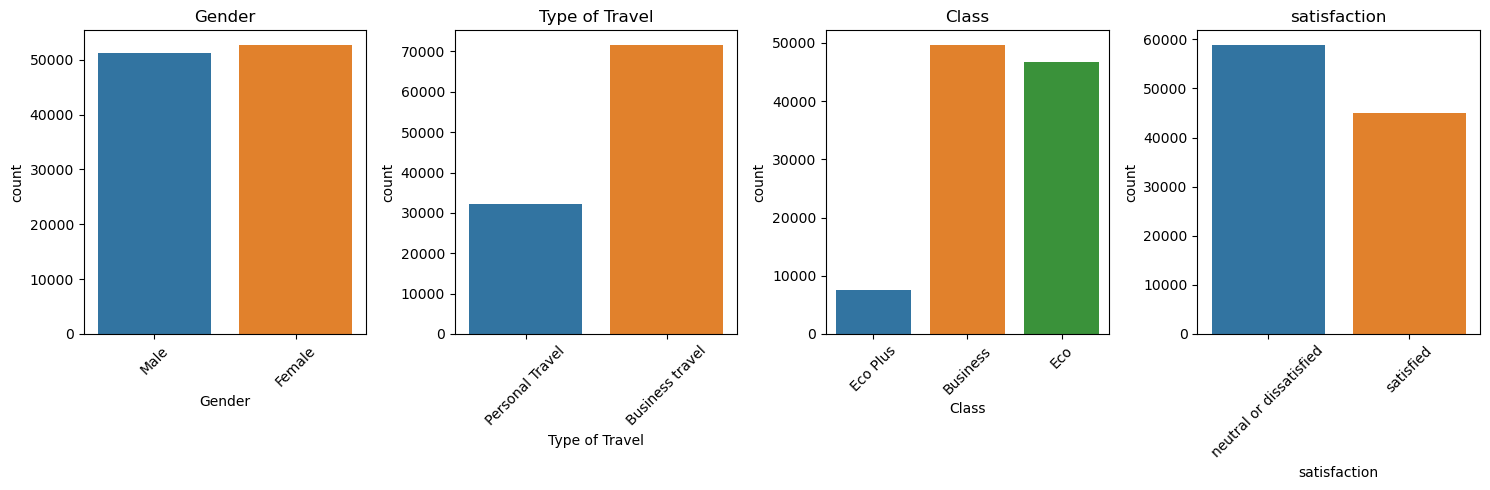

In [105]:
numeric_train = train.select_dtypes(['float', 'int'])
categorical_train = train.select_dtypes(['object'])

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, column in enumerate(categorical_train.columns):
    ax = axes[i]
    sns.countplot(data=categorical_train, x=column, ax=ax)
    ax.set_title(column)
    ax.tick_params(axis='x', rotation=45)

    
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
- There is an equal number of male and female participants in the survey. </br>
- Most customers on this airline are business travel customers and most of them purchase tickets for Business class, followed by Eco class. </br>
- A large proportion of customers felt neutral or dissatisfied with the airline.
</div>

7. Create some count plots of numerical categorical columns to view how many of each unique valeue that there is? (q: what insights can we get from this?)

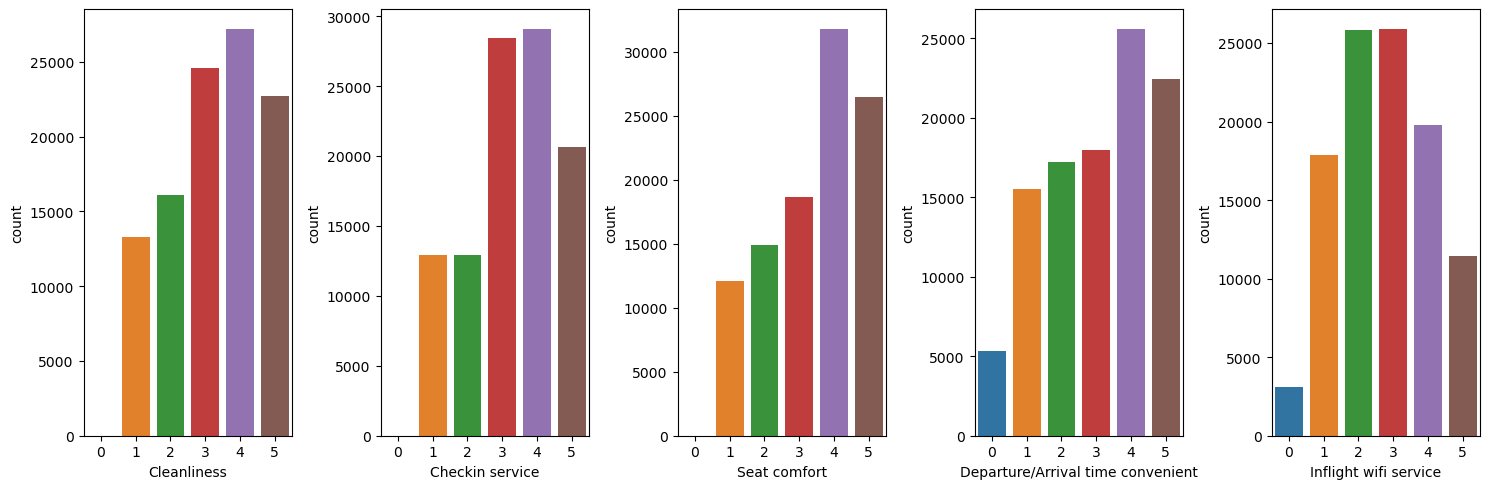

In [106]:
categoric = [
              "Cleanliness",  "Checkin service",  
              "Seat comfort", "Departure/Arrival time convenient",
             "Inflight wifi service"
             ]


fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, column in enumerate(categoric):
    col = i % 5
    
    ax = axes[col]
    sns.countplot(data=train, x=column, ax=ax)
    
plt.tight_layout()
plt.show()

8. Create some Kernel density plots for view the distribution of continuous variables

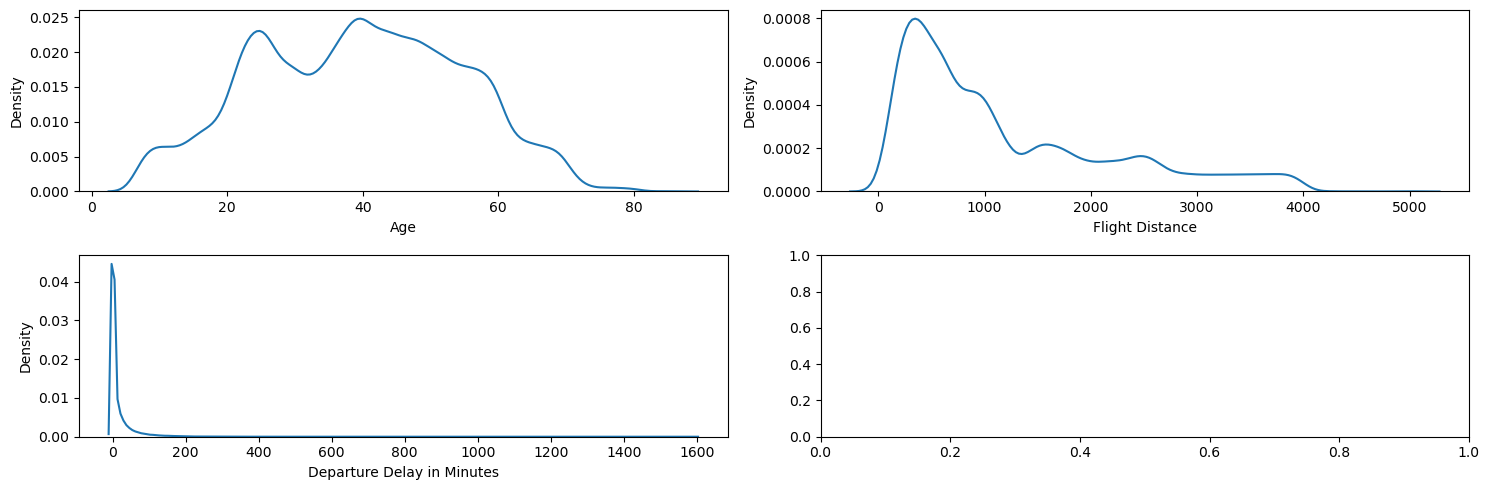

In [107]:
numeric = ["Age", "Flight Distance", "Departure Delay in Minutes"]

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
for i, column in enumerate(numeric):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    sns.kdeplot(data=train, x=column, ax=ax)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
The variables "Flight Distance" and "Departure Delay in Minutes" are all heavily right-skewed. 
</div>

#### **🛩 Machine learning preparation**
****

In [108]:
clean_train = train
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Age                                103904 non-null  int64 
 2   Type of Travel                     103904 non-null  object
 3   Class                              103904 non-null  object
 4   Flight Distance                    103904 non-null  int64 
 5   Inflight wifi service              103904 non-null  int64 
 6   Departure/Arrival time convenient  103904 non-null  int64 
 7   Seat comfort                       103904 non-null  int64 
 8   Checkin service                    103904 non-null  int64 
 9   Cleanliness                        103904 non-null  int64 
 10  Departure Delay in Minutes         103904 non-null  int64 
 11  satisfaction                       103904 non-null  

/Users/rayanbessadi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


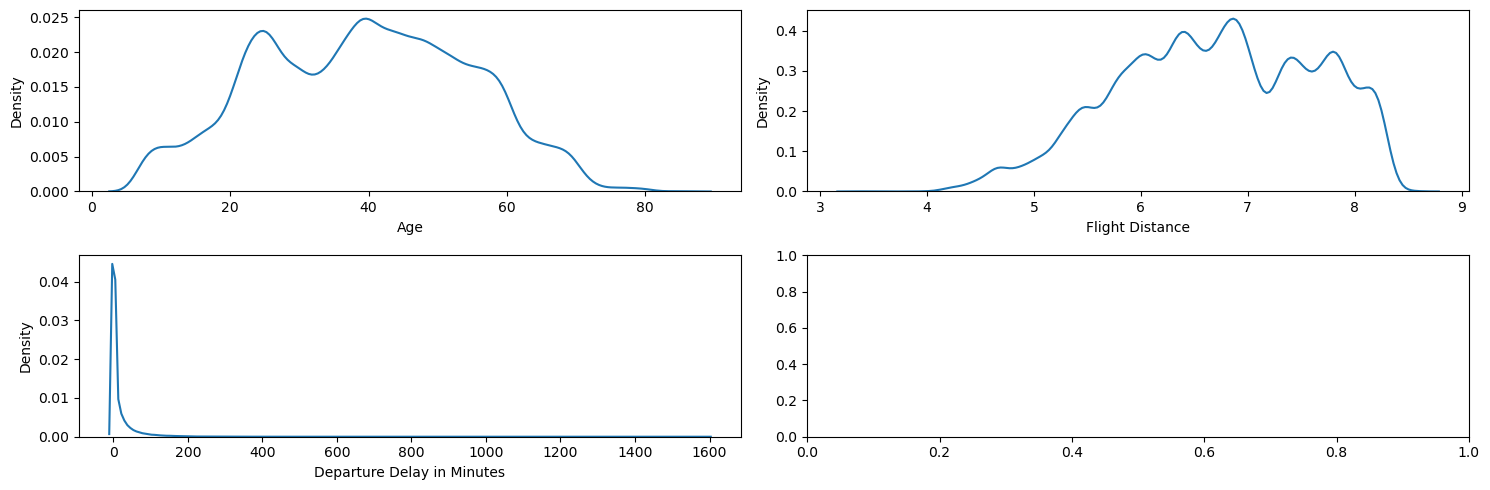

In [109]:
# Normalize the numeric variables 
clean_train["Flight Distance"] = np.log(clean_train["Flight Distance"])
clean_train["Depature Delay in Minutes"] = np.log(clean_train["Departure Delay in Minutes"])

numeric = ["Age", "Flight Distance", "Departure Delay in Minutes"]

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
for i, column in enumerate(numeric):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    sns.kdeplot(data= clean_train, x=column, ax=ax)
    
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
Although "Departure Delay in Minutes" is still very right skewed, "Fight Distance" is now more normally distribured. 
</div>

In [110]:
clean_train.head() 

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Seat comfort,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction,Depature Delay in Minutes
0,Male,13,Personal Travel,Eco Plus,6.131226,3,4,5,4,5,25,neutral or dissatisfied,3.218876
1,Male,25,Business travel,Business,5.459586,3,2,1,1,1,1,neutral or dissatisfied,0.000000
2,Female,26,Business travel,Business,7.040536,2,2,5,4,5,0,satisfied,-inf
3,Female,25,Business travel,Business,6.331502,2,5,2,1,2,11,neutral or dissatisfied,2.397895
4,Male,61,Business travel,Business,5.365976,3,3,5,3,3,0,satisfied,-inf


In [111]:
X = clean_train.drop(["satisfaction"], axis = 1)
y = clean_train["satisfaction"]

9. We next need to normalize the numeric variables, this is the process of transforming the variables to a common scale or range to ensure a fair comparison between variables and prevent one variable from dominating others due to its larger magnitude, we will normalize using the standard scalar object

In [112]:
# Scaling
scaler = StandardScaler()
numeric_col = ["Age", "Flight Distance", "Departure Delay in Minutes"]

# Check for infinite or extremely large values in X
X_has_inf = np.isinf(X[numeric_col]).any().any()
X_has_large_vals = np.abs(X[numeric_col]) > 1e6
X_has_large_vals = X_has_large_vals.any().any()

# Handle the problematic values in X
if X_has_inf or X_has_large_vals:
    X[numeric_col] = X[numeric_col].replace([np.inf, -np.inf], np.nan)
    X[numeric_col] = X[numeric_col].clip(lower=-1e6, upper=1e6)  # Replace extremely large values with a suitable range
    X[numeric_col].fillna(X[numeric_col].mean(), inplace=True)  # Replace NaN values with column mean

X[numeric_col] = scaler.fit_transform(X[numeric_col])

In [113]:
X_has_large_vals.any().any()

False

10. We now want to turn the categorical columns into a machine readable format so it can be interpretted by our model, we do this using the Label encoder object

In [114]:
le = LabelEncoder()
cat_col = ["Gender", "Type of Travel", "Class"]

for cols in cat_col: 
    X[cols] = le.fit_transform(X[cols])

X = X.iloc[:, :-1]
X.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Seat comfort,Checkin service,Cleanliness,Departure Delay in Minutes
0,1,-1.745279,1,2,-0.624110,3,4,5,4,5,0.266393
1,1,-0.951360,0,0,-1.356305,3,2,1,1,1,-0.361375
2,0,-0.885200,0,0,0.367182,2,2,5,4,5,-0.387532
3,0,-0.951360,0,0,-0.405778,2,5,2,1,2,-0.099805
4,1,1.430397,0,0,-1.458354,3,3,5,3,3,-0.387532


11. We also want to do the same thing to our target variable

In [115]:
le = LabelEncoder()
y = le.fit_transform(y)

12. We are then splitting our training dataset into train and a test datasets, this will allow us to evaluate which model is best for predicting, we also cannot use the actual test dataset becuase this results in data leakage, data leakage occurs when information from the testing set is inadvertently used during model training. This can lead to overly optimistic performance estimates

In [116]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print(f"X_train shape: ", X_train.shape)
print(f"X_val shape: ", X_val.shape)

X_train shape:  (83123, 11)
X_val shape:  (20781, 11)


#### **🛩 Modelling**
****

13. Here we create a function that calculates key metrics used to measure the effectiveness of a model

In [117]:
def mod (model):
    accuracy = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(accuracy_score))).mean()
    F1 = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(f1_score))).mean()
    precision = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(precision_score))).mean()
    recall = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(recall_score))).mean()
    auc = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(roc_auc_score))).mean()
    
    return (accuracy, F1, precision, recall, auc)

14. We test out Logistic regression to view its affectivenes

In [118]:
models = []

models.append(('Logistic_Reg', LogisticRegression()))
models

[('Logistic_Reg', LogisticRegression())]

In [119]:
model_name = []
model_metrics = []

for i in models: 
    model_name.append(i[0])
    model_metrics.append(mod(i[1]))

final = pd.DataFrame(model_metrics, 
                    columns = ['Accuracy', 'F1', 'Precision', 'Recall', 'AUC'], 
                    index = model_name)

final

,Accuracy,F1,Precision,Recall,AUC
Logistic_Reg,0.823057,0.79645,0.794103,0.79889,0.820214


In [120]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

auc_score = roc_auc_score(y_val, y_pred)
print("AUC Score:", auc_score)

Accuracy: 0.8226745584909292
AUC Score: 0.8198108114377882


#### **🛩 Test prediction**
****

15. we now all of our necessary changes to the test dataset that we had previously done to the train dataset as follows


In [121]:
test = pd.read_csv("/Users/rayanbessadi/Documents/Code/Data science/Data science/Satisfaction/test_beginner.csv")
test.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Seat comfort,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Female,52,Business travel,Eco,160,5,4,3,2,5,50,satisfied
1,Female,36,Business travel,Business,2863,1,1,5,3,5,0,satisfied
2,Male,20,Business travel,Eco,192,2,0,2,2,2,0,neutral or dissatisfied
3,Male,44,Business travel,Business,3377,0,0,4,3,4,0,satisfied
4,Female,49,Business travel,Eco,1182,2,3,2,4,4,0,satisfied


**a.** Taking the natural logarithm of the numerical variables that are skewed, the is done to make it more suitable for model predicting and reduce skewedness

In [122]:
test["Flight Distance"] = np.log(test["Flight Distance"])
test["Depature Delay in Minutes"] = np.log(test["Departure Delay in Minutes"])

/Users/rayanbessadi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


**d.** Define the columns for our x and y

In [123]:
X = test.drop(["satisfaction"], axis = 1)
y = test["satisfaction"]

**e.** We now normalise the numerical variables

In [124]:
scaler = StandardScaler()
numeric_col = ["Age", "Flight Distance", "Departure Delay in Minutes"]

# Check for infinite or extremely large values in X
X_has_inf = np.isinf(X[numeric_col]).any().any()
X_has_large_vals = np.abs(X[numeric_col]) > 1e6
X_has_large_vals = X_has_large_vals.any().any()

# Handle the problematic values in X
if X_has_inf or X_has_large_vals:
    X[numeric_col] = X[numeric_col].replace([np.inf, -np.inf], np.nan)
    X[numeric_col] = X[numeric_col].clip(lower=-1e6, upper=1e6)  # Replace extremely large values with a suitable range
    X[numeric_col].fillna(X[numeric_col].mean(), inplace=True)  # Replace NaN values with column mean

X[numeric_col] = scaler.fit_transform(X[numeric_col])

**f.** We now encode our categorical variables

In [125]:
le = LabelEncoder()
cat_col = ["Gender", "Type of Travel", "Class"]

for cols in cat_col: 
    X[cols] = le.fit_transform(X[cols])

X = X.iloc[:, :-1]
X.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Seat comfort,Checkin service,Cleanliness,Departure Delay in Minutes
0,0,0.817887,0,1,-1.779689,5,4,3,2,5,0.953810
1,0,-0.239238,0,0,1.364273,1,1,5,3,5,-0.382286
2,1,-1.296363,0,1,-1.580964,2,0,2,2,2,-0.382286
3,1,0.289325,0,0,1.544246,0,0,4,3,4,-0.382286
4,0,0.619676,0,1,0.400019,2,3,2,4,4,-0.382286


In [126]:
le = LabelEncoder()
y = le.fit_transform(y)

16. Lastly we used our pretrained model to predict whetehr airline passengers were satisfied or not from the test dataset and retreive the key metrics for our model

In [127]:
y_pred = lr.predict(X)

accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y, y_pred)
print("F1 score:", f1)

auc_score = roc_auc_score(y, y_pred)
print("AUC Score:", auc_score)

Accuracy: 0.8217585463504774
F1 score: 0.7983800731579865
AUC Score: 0.8198174249302632
